<a href="https://colab.research.google.com/github/s1natraaa/Segmentasi_Kepribadian_Pelanggan_Supermarket/blob/main/Segmentasi_Kepribadian_Pelanggan_Supermarket_untuk_Mengidentifikasi_ROI_Terbesar_Menggunakan_Algoritma_KNN_Nis_Al_Ren.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Customer Segmentation</h1></center>

 Hubungan personal yang baik dengan pelanggan sangat penting untuk kesuksesan sebuah perusahaan. Segmentasi pelanggan membantu perusahaan untuk mengelompokkan pelanggannya ke dalam kategori yang berbeda berdasarkan kebutuhan, kebiasaan belanja, kondisi keuangan, dan faktor relevan lainnya. Hal ini membantu perusahaan untuk menganalisis kebutuhan basis pelanggan dan bersama dengan minat, gaya hidup, prioritas mereka dan mempelajari kebiasaan belanja mereka yang dapat digunakan dalam merencanakan rencana akuisisi dan retensi pelanggan. Segmentasi Pelanggan adalah langkah kunci dalam proses menyempurnakan strategi pemasaran dan membantu dalam meningkatkan pendapatan perusahaan karena pelanggan menerima kebijakan pemasaran hanya untuk produk-produk yang mereka butuhkan.

Dalam file kodingan analisis ini kami akan menganalisis dan mensegmentasi pelanggan dari sebuah toko untuk membantu mereka lebih memahami konsumen mereka sehingga mereka dapat menyusun strategi yang sesuai dan meningkatkan pendapatan mereka.

<center><h3>Importing the necessary libraries</h3></center>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import datetime as dt

<h3><center>Reading the Dataset</h3></center>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = "/content/drive/MyDrive/Dataset/marketing_campaign.csv"
df = pd.read_csv(path, sep='\t')
print(df.head(5))

Mounted at /content/drive
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  C

<h3><center>Data Pre-Processing</h3></center>



**Menangani nilai yang kosong**

In [ ]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
df = df.dropna()    #Dropping rows with null values

**Feature Engineering**

In [ ]:
df['Total_kids']= df['Kidhome'] + df['Teenhome']
df['Total_Acc'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df['Total_Purchases'] = df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']
df['Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'] #Combining all types of spendind in one feature

df['Age'] = 2015 - df.Year_Birth

<ipython-input-209-7ddbe7531e20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_kids']= df['Kidhome'] + df['Teenhome']
<ipython-input-209-7ddbe7531e20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Acc'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
<ipython-input-209-7ddbe7531e20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [ ]:
df.Marital_Status = df.Marital_Status.replace({'Together': 'Married',
                                                'Divorced': 'Single',
                                                'Widow': 'Single',
                                                'Alone': 'Single',
                                                'Absurd': 'Single',
                                                'YOLO': 'Single'}) #Converting the Marital_Status into a binary feature

<ipython-input-210-36e3f2fba3bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Marital_Status = df.Marital_Status.replace({'Together': 'Married',


**Removing Outliers**

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_kids,Total_Acc,Total_Purchases,Spending,Age
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,0.013538,0.009477,3.0,11.0,0.150271,0.947202,0.448556,14.880866,607.075361,46.179603
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,0.115588,0.096907,0.0,0.0,0.357417,0.749062,0.892440,7.670957,602.900476,11.985554
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.0,11.0,0.000000,0.000000,0.000000,0.000000,5.000000,19.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,3.0,11.0,0.000000,0.000000,0.000000,8.000000,69.000000,38.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,3.0,11.0,0.000000,1.000000,0.000000,15.000000,396.500000,45.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,3.0,11.0,0.000000,1.000000,1.000000,21.000000,1048.000000,56.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,3.0,11.0,1.000000,3.000000,5.000000,44.000000,2525.000000,122.000000


Dengan menggunakan output di atas, kita dapat menyimpulkan bahwa kolom Usia dan Pendapatan memiliki outlier yang harus dihilangkan sebelum bekerja lebih lanjut

In [ ]:
df = df[df.Age < 100]
df = df[df.Income < 120000]

<center><h3>Exploratory Data Analysis</h3></center>

Text(0.5, 1.0, 'Marital Status Distribution')

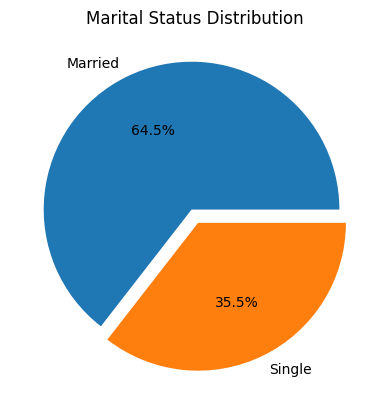

In [ ]:
maritalstatus = df.Marital_Status.value_counts()
plt.pie(maritalstatus,
             labels = maritalstatus.index,
             explode=(0.05,0.05),
             autopct='%1.1f%%')
plt.title('Marital Status Distribution')

Text(0.5, 1.0, 'Spending vs Income')

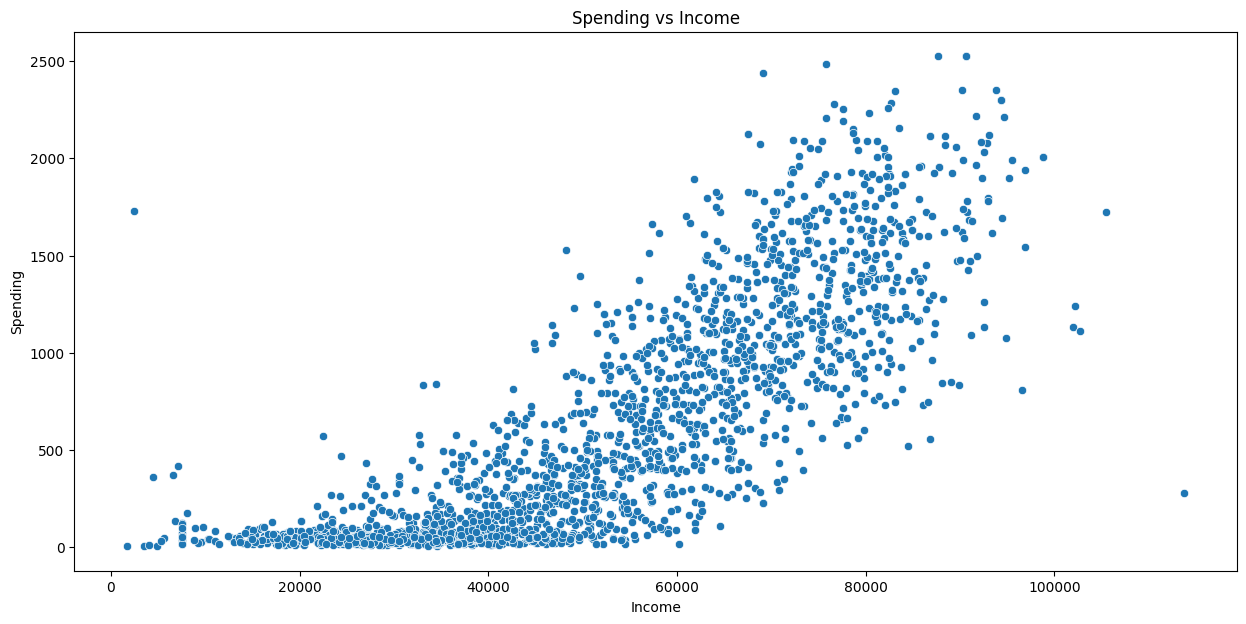

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, y='Spending', x='Income')
plt.title('Spending vs Income')

Text(0.5, 1.0, 'Campaign Analysis')

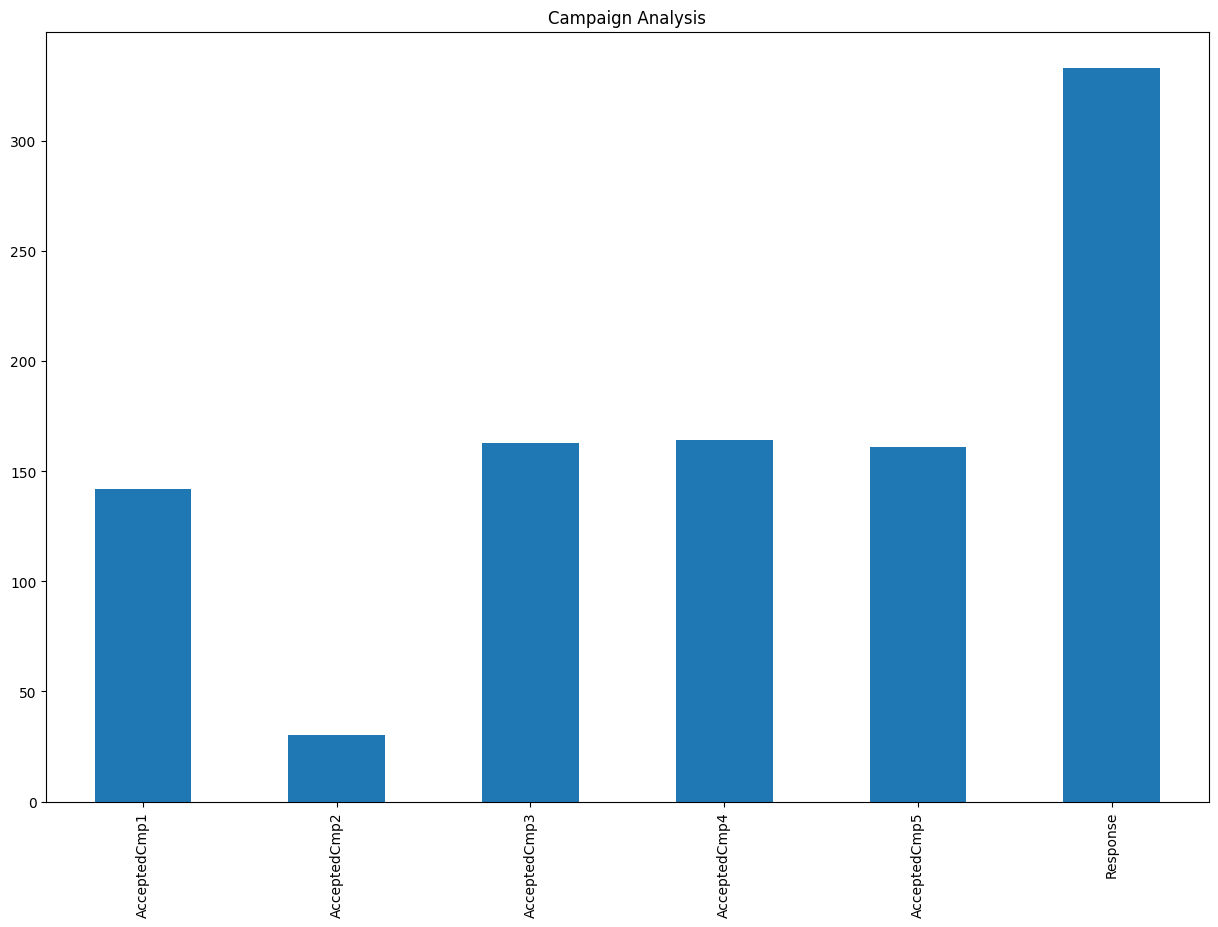

In [ ]:
campaign = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
                                                  'AcceptedCmp5', 'Response']].sum()

campaign.plot(kind='bar', figsize=(15,10))
plt.title('Campaign Analysis')

Meskipun grafik ini berguna untuk memahami keragaman pelanggan yang telah membeli dari toko, grafik ini tidak memberi kita gambaran tentang kategori yang dapat dibagi ke dalam kategori-kategori dan minat atau kebiasaan belanja pelanggan. Kita harus melakukan segmentasi pelanggan untuk mendapatkan informasi tambahan seperti ini

**Extracting Features**

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Total_kids', 'Total_Acc', 'Total_Purchases', 'Spending', 'Age'],
      dtype='object')

Seperti yang dapat kita lihat, dataset ini memiliki terlalu banyak kolom yang tidak diperlukan untuk tujuan membagi pelanggan ke dalam segmen yang berbeda. Oleh karena itu, kami mengekstrak kolom yang relevan dari dataframe ini ke dalam dataframe yang berbeda dan menyimpan kolom lainnya untuk analisis selanjutnya

In [ ]:
X = df.drop(['ID', 'Year_Birth','Kidhome','Education', 'Marital_Status',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'], axis=1)    #Dropping the irrelevant columns

X.columns

Index(['Income', 'Total_kids', 'Total_Acc', 'Total_Purchases', 'Spending',
       'Age'],
      dtype='object')



**Mencari jumlah cluster menggunakan metode elbow**

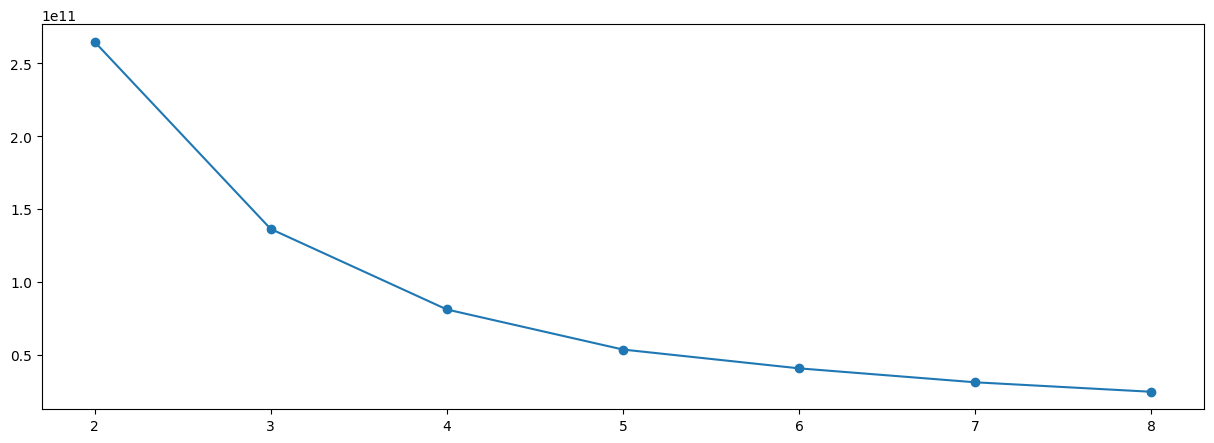

In [ ]:
options = range(2,9)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)


plt.figure(figsize=(15,5))
plt.plot(options, inertias, '-o')

Dari grafik di atas, kita dapat menyimpulkan bahwa **4 adalah jumlah klaster yang ideal** di mana pelanggan dapat dibagi untuk mendapatkan informasi yang paling akurat.

**KNN Clustering**

In [ ]:
model = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(X)

preds = model.predict(X)

segmented_customers = X.copy()
segmented_customers['clusters'] = preds
df['clusters'] = preds

In [ ]:
segmented_customers.head()

,Income,Total_kids,Total_Acc,Total_Purchases,Spending,Age,clusters
0,58138.0,0,1,25,1617,58,2
1,46344.0,2,0,6,27,61,3
2,71613.0,0,0,21,776,50,0
3,26646.0,1,0,8,53,31,1
4,58293.0,1,0,19,422,34,2


**Understanding the Clusters**

Model KNN telah mendistribusikan pelanggan ke dalam 4 cluster yang berbeda. Namun kita harus menganalisis distribusi ini untuk memahami arti dari setiap klaster dan bagian mana dari pelanggan yang diwakili oleh klaster tersebut

<Axes: xlabel='clusters', ylabel='Income'>

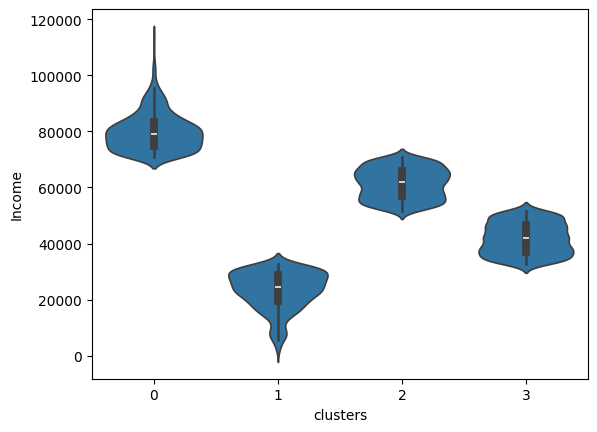

In [ ]:
sns.violinplot(data=segmented_customers, y= 'Income', x= 'clusters')

<Axes: xlabel='clusters', ylabel='Total_kids'>

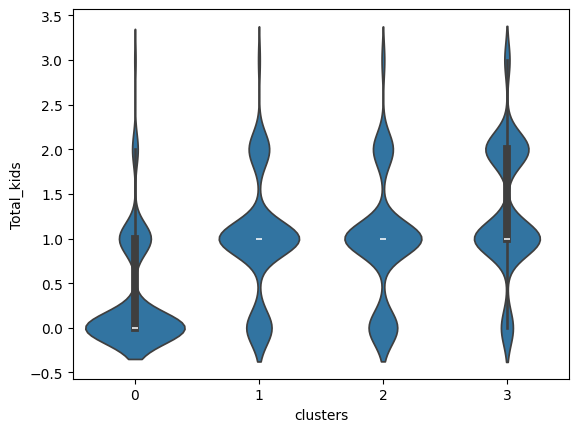

In [ ]:
sns.violinplot(data=segmented_customers, y= 'Total_kids', x= 'clusters')

<Axes: xlabel='clusters', ylabel='Spending'>

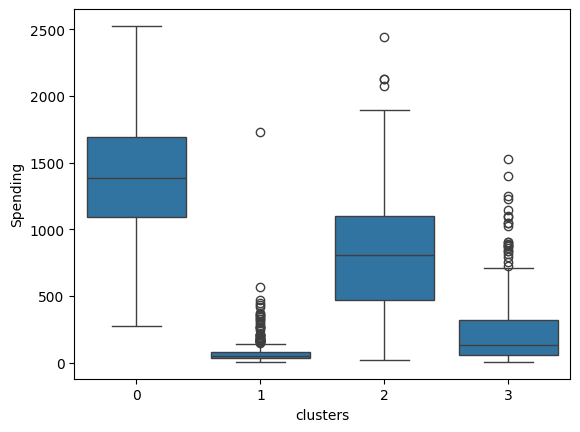

In [ ]:
sns.boxplot(data=segmented_customers, y= 'Spending', x= 'clusters')

<Axes: xlabel='clusters', ylabel='Age'>

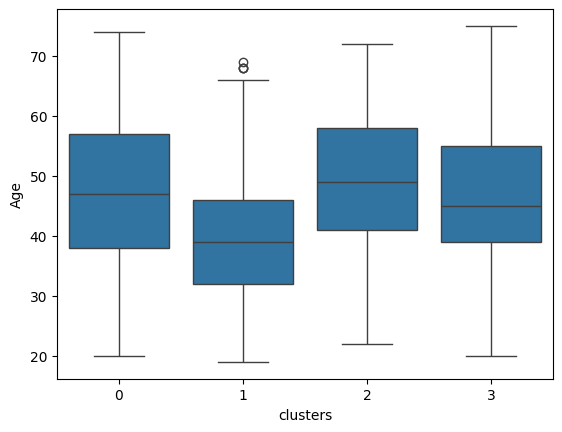

In [ ]:
sns.boxplot(data=segmented_customers, y= 'Age', x= 'clusters')

Pengamatan yang cermat terhadap plot di atas membawa kita pada kesimpulan bahwa cluster dapat diberi nama sebagai berikut:

**0 ---> Upper Class**

**1 ---> Lower Class**

**2 ---> Upper Middle Class**

**3 ---> Middle Class**


**Analyzing the Clusters**

Setelah kami mengelompokkan pelanggan ke dalam empat klaster yang berbeda, kami menganalisis klaster-klaster tersebut dan mencoba memahami perilaku dan kebutuhan mereka,

In [ ]:
segmented_customers.clusters = segmented_customers.clusters.replace({0 : 'Upper Middle Class',
                                                           1 : 'Lower Class',
                                                           2 : 'Upper Class',
                                                           3 : 'Lower Middle Class'})

df.clusters = df.clusters.replace({0 : 'Upper Middle Class',
                                                           1 : 'Lower Class',
                                                           2 : 'Upper Class',
                                                           3 : 'Lower Middle Class'})

In [ ]:
segmented_customers.head()

,Income,Total_kids,Total_Acc,Total_Purchases,Spending,Age,clusters
0,58138.0,0,1,25,1617,58,Upper Class
1,46344.0,2,0,6,27,61,Lower Middle Class
2,71613.0,0,0,21,776,50,Upper Middle Class
3,26646.0,1,0,8,53,31,Lower Class
4,58293.0,1,0,19,422,34,Upper Class


Text(0.5, 1.0, 'Division of Clusters')

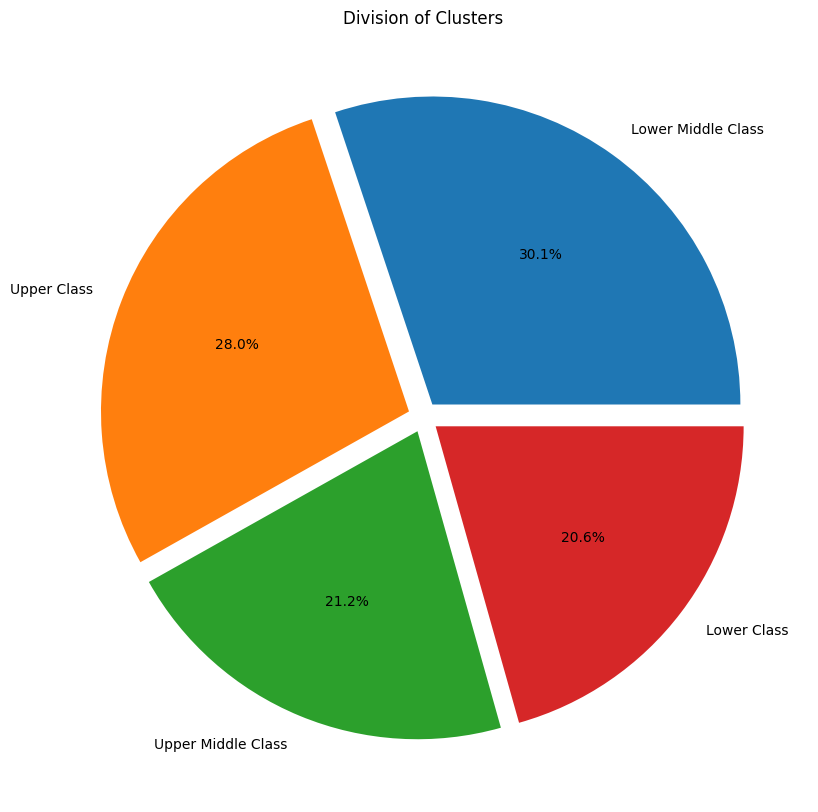

In [ ]:
cluster_count= segmented_customers['clusters'].value_counts()

plt.figure(figsize=(20,10))
plt.pie(cluster_count, labels= cluster_count.index, explode=(0.05, 0.05, 0.05, 0.05), autopct='%1.1f%%')
plt.title('Division of Clusters')

Text(0, 0.5, 'Spending')

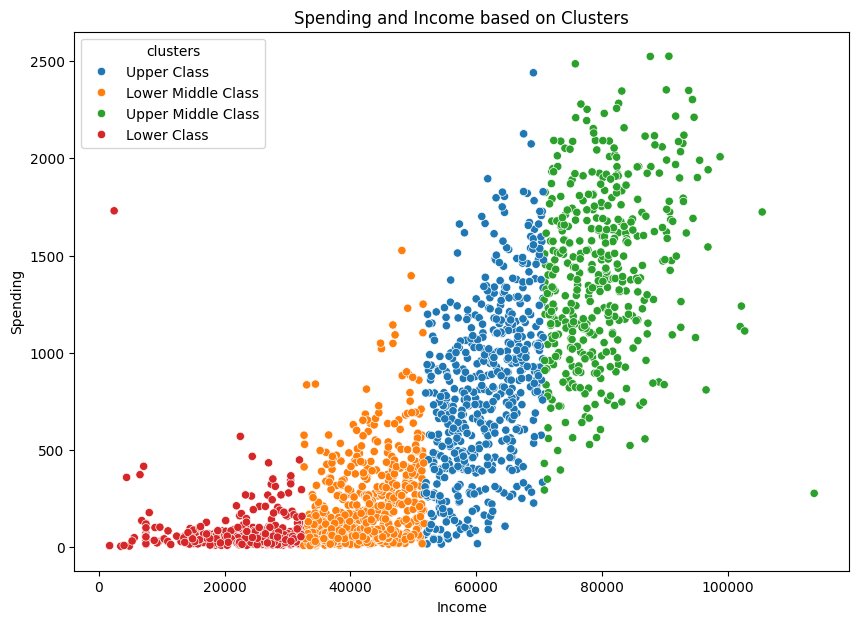

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=segmented_customers, y='Spending', x='Income', hue='clusters')
plt.title('Spending and Income based on Clusters')
plt.xlabel('Income')
plt.ylabel('Spending')

Plot di atas menegaskan kembali bahwa pemahaman kita tentang klaster adalah benar

Text(0.5, 1.0, 'Total Spending by Cluster')

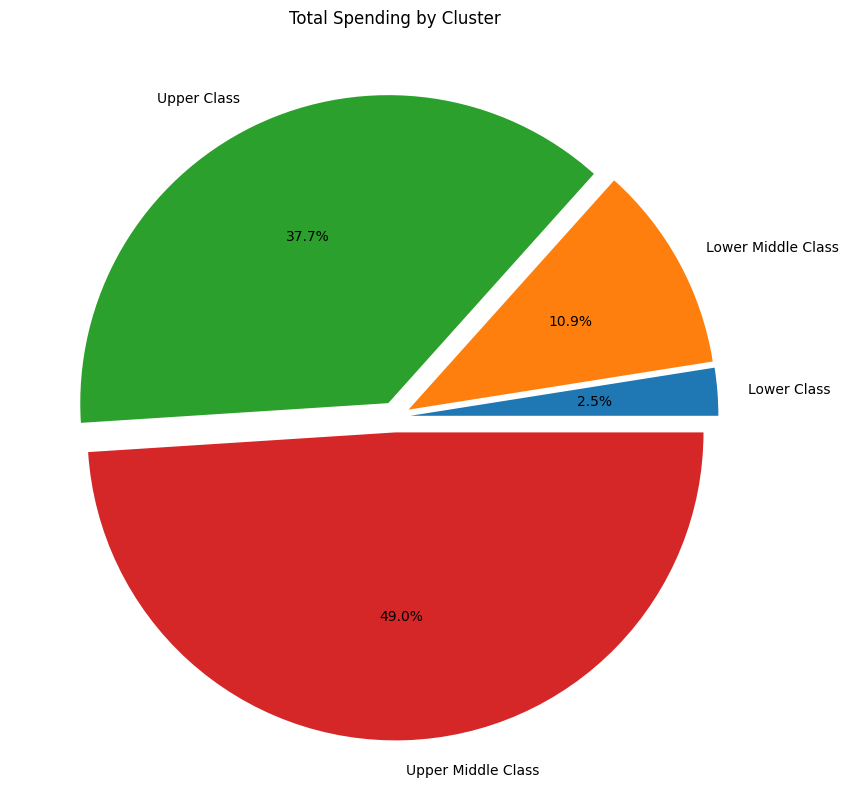

In [ ]:
cluster_total_spend = df.groupby('clusters')['Spending'].sum()

plt.figure(figsize=(20,10))
plt.pie(cluster_total_spend, labels= cluster_total_spend.index, explode=(0.05, 0.05, 0.05, 0.05), autopct='%1.1f%%')
plt.title('Total Spending by Cluster')



Banyaknya jumlah pembelian yang di belanjakan oleh customer dari upper class memberikan perbedaan yang sangat signifikan daripada lower class.

Text(0.5, 1.0, 'Cluster wise Spendings')

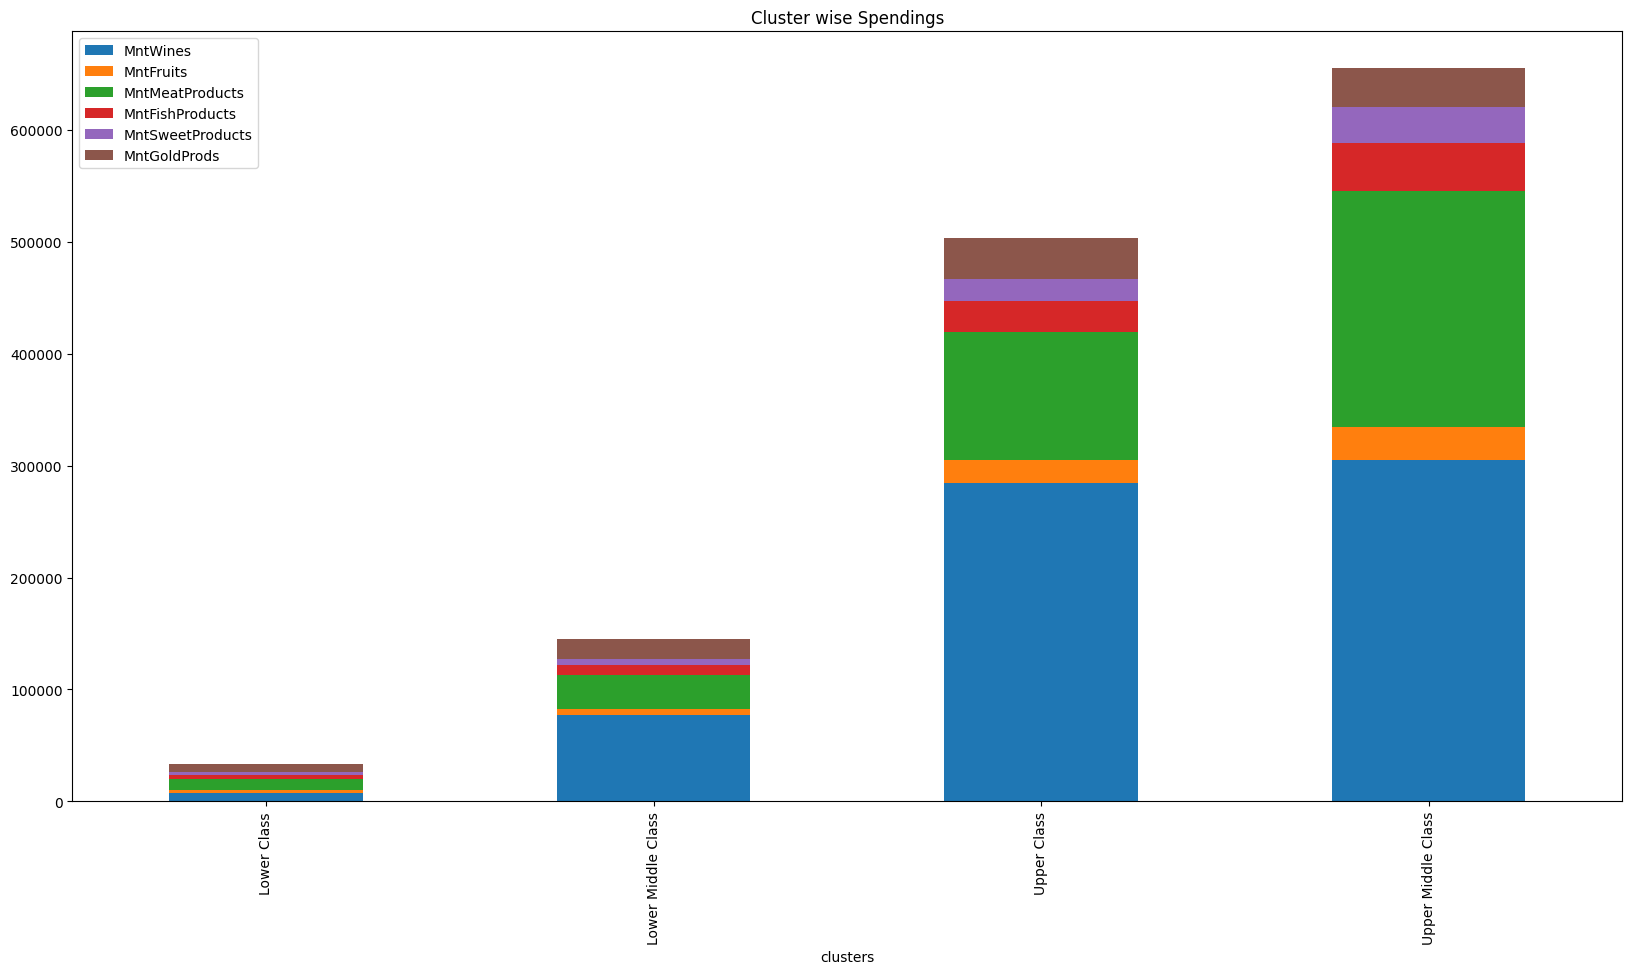

In [ ]:
cluster_spendings = df.groupby('clusters')[['MntWines', 'MntFruits','MntMeatProducts',
                                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

cluster_spendings.plot(kind='bar', stacked=True,figsize=(20,10))
plt.title('Cluster wise Spendings')


Source utama penghasilan dari store adalah penjualan wine dan daging dimana produk lain seperti buah, ikan, manisan dan emas tidak bisa menyaingin kontribusi dari wine dan daging

Text(0.5, 1.0, 'Cluster wise Purchasing habits')

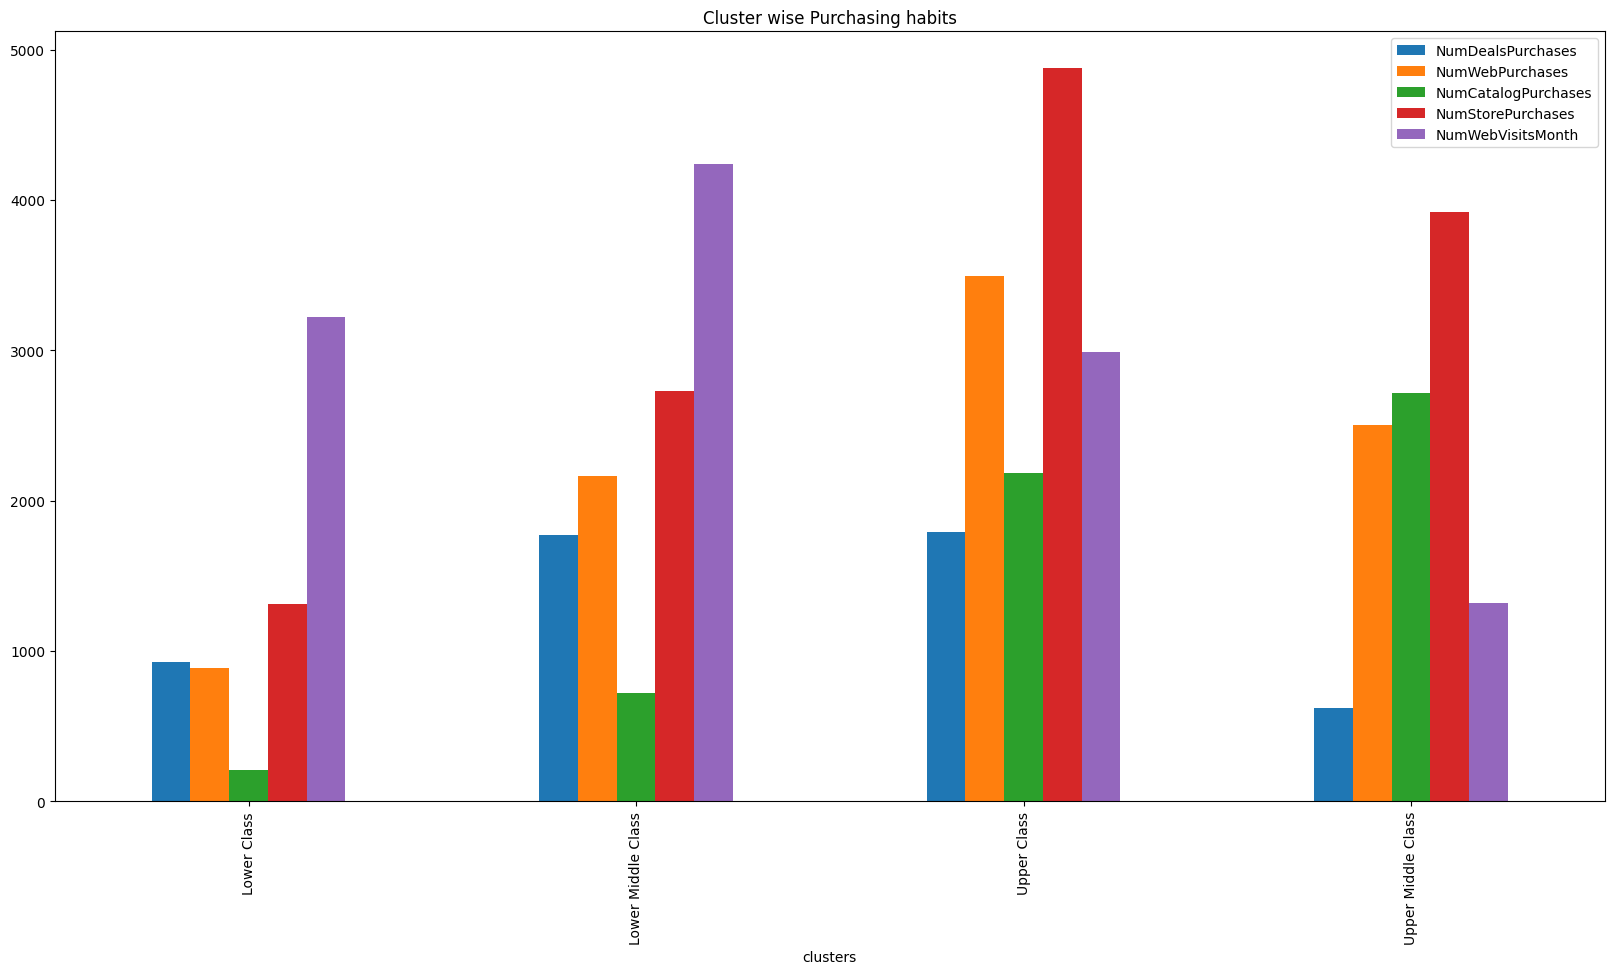

In [ ]:
cluster_purchases = df.groupby('clusters')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                                                  'NumStorePurchases', 'NumWebVisitsMonth']].sum()

cluster_purchases.plot(kind='bar', figsize=(20,10))
plt.title('Cluster wise Purchasing habits')

Plot ini memberikan kita beberapa informasi yang sangat berguna tentang kebiasaan belanja dari berbagai segmen basis pelanggan:
1. Pelanggan kelas bawah dan menengah melakukan lebih banyak pembelian dengan bantuan diskon
2. Kelas atas dan menengah ke atas telah melakukan lebih banyak pembelian melalui web meskipun mereka lebih jarang mengunjungi situs web.
3. Kelas Atas dan Menengah Atas adalah yang paling banyak melakukan pembelian di toko dan katalog



Text(0.5, 1.0, 'Cluster wise Marketing Results')

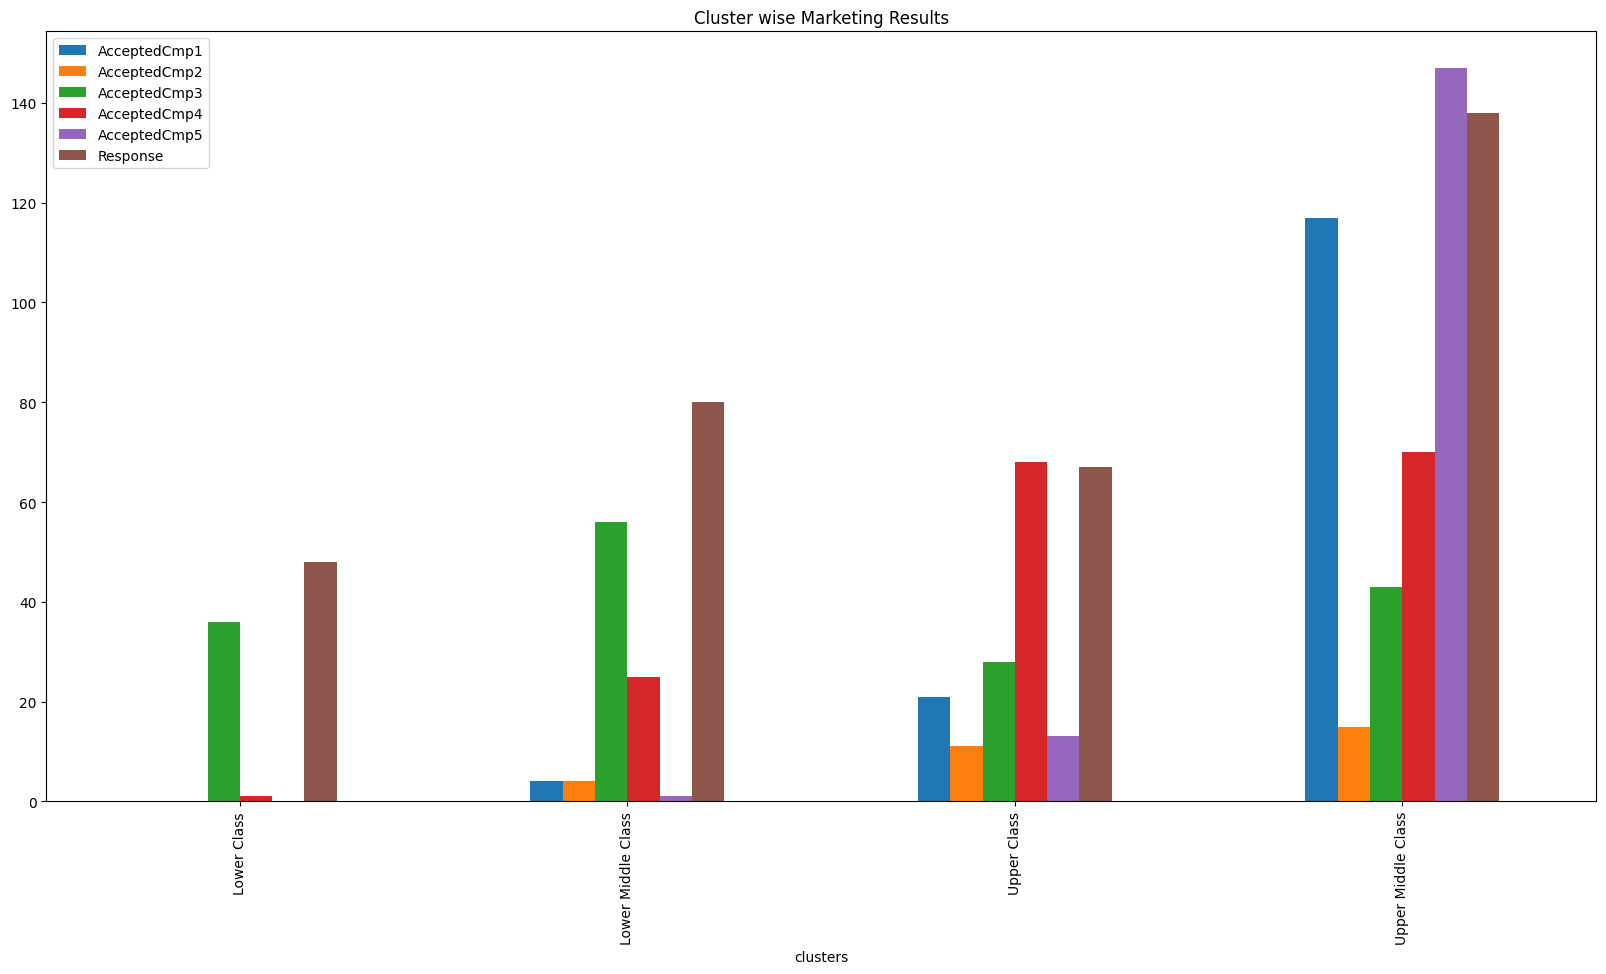

In [ ]:
cluster_campaign = df.groupby('clusters')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
                                                  'AcceptedCmp5', 'Response']].sum()

cluster_campaign.plot(kind='bar', figsize=(20,10))
plt.title('Cluster wise Marketing Results')



bisa diliat kalau marketing campaign dari storenya itu memiliki impact yang lebih besar ke upperclass daripada lower dan middle class

# Conclusion

Dengan analisis yang cermat terhadap plot di atas, kami dapat menyimpulkan hal-hal berikut untuk para pemilik toko:

1. Meskipun kelas menengah ke bawah dan menengah ke bawah menyumbang hampir 50% dari basis konsumen, mereka hanya menghasilkan sekitar 12% dari pendapatan. Pemilik toko perlu meluncurkan kebijakan sehingga pelanggan yang termasuk dalam lapisan masyarakat yang lebih rendah membeli lebih banyak produk dan berkontribusi secara signifikan terhadap perolehan pendapatan.

2. Pada jalur yang sama, pelanggan kelas menengah ke bawah dan menengah ke bawah menyumbang sebagian besar kunjungan situs web untuk toko. Namun, segmen ini jauh tertinggal dalam hal pembelian melalui web. Hal ini menunjukkan bahwa toko tidak dapat memenuhi kebutuhan dan persyaratan orang-orang dari segmen ini meskipun mereka terpikat olehnya.

3. Kami juga melihat kesenjangan besar dalam respon terhadap kampanye pemasaran. Para pelanggan dari kelas atas telah merespon dengan baik terhadap penawaran-penawaran yang diberikan, sedangkan hal yang sama tidak terlihat dari segmen lainnya.

4. Untuk mengatasi masalah kurangnya penjualan ke bagian bawah masyarakat ini, toko perlu memenuhi lebih banyak kebutuhan mereka. Telah terlihat sebelumnya bahwa orang-orang dari segmen ini tertarik terhadap penawaran dan penjualan toko. Meningkatkan frekuensi penjualan yang menarik seperti itu akan membantu toko dalam meningkatkan penjualan.

5. Selain itu, toko juga harus fokus pada perbedaan dalam penjualan produk yang berbeda. Penjualan permen, buah-buahan, ikan dan emas sangat sedikit jika dibandingkan dengan penjualan anggur dan daging. Toko perlu meningkatkan strategi pemasarannya untuk produk-produk ini sehingga dapat menjangkau basis pasar produk-produk ini

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Total_kids,Total_Acc,Total_Purchases,Spending,Age,clusters
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,3,11,1,0,1,25,1617,58,Upper Class
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,3,11,0,2,0,6,27,61,Lower Middle Class
2,4141,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,0,3,11,0,0,0,21,776,50,Upper Middle Class
3,6182,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0,3,11,0,1,0,8,53,31,Lower Class
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,3,11,0,1,0,19,422,34,Upper Class


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Menghitung Davies-Bouldin Index untuk clustering
db_index = davies_bouldin_score(X, preds)
print(f"Davies-Bouldin Index: {db_index:.2f}")


Davies-Bouldin Index: 0.55


In [ ]:
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score untuk clustering
silhouette_avg = silhouette_score(X, preds)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.54


In [ ]:
# Tambahkan kolom baru untuk total_revenue dan total_cost
df['total_revenue'] = df['Total_Acc'] * df['Z_Revenue']  # Contoh: Revenue dihitung dari produk anggur
df['total_cost'] = df['Z_CostContact'] * 1

# Buat pengelompokan data berdasarkan cluster
df_impact = df.groupby('clusters')[['total_revenue', 'total_cost']].sum().reset_index()

# Hitung ROI
roi = round((df_impact['total_revenue'].sum() - df_impact['total_cost'].sum()) / df_impact['total_cost'].sum() * 100, 2)

# Cetak hasil
print("Summary by clusters:")
print(df_impact)
print(f'\nROI sebelum retargeted marketing: {roi}%')

Summary by clusters:
             clusters  total_revenue  total_cost
0         Lower Class            935        1365
1  Lower Middle Class           1870        1992
2         Upper Class           2288        1854
3  Upper Middle Class           5830        1404

ROI sebelum retargeted marketing: 65.12%


In [ ]:
df['total_revenue'] = df['Total_Acc'] * df['Z_Revenue']  # Revenue dihitung berdasarkan produk
df['total_cost'] = df['Z_CostContact'] * 1

# Buat pengelompokan data berdasarkan cluster
df_impact = df.groupby('clusters')[['total_revenue', 'total_cost']].sum().reset_index()

# Fungsi untuk menghitung ROI per cluster
def calculate_roi(cluster_name):
    cluster_data = df_impact[df_impact['clusters'] == cluster_name]
    if cluster_data.empty:
        return f"{cluster_name}: No data available."
    roi = round((cluster_data['total_revenue'].sum() - cluster_data['total_cost'].sum()) /
                cluster_data['total_cost'].sum() * 100, 2)
    return f"{cluster_name} ROI: {roi}%"

# Hitung ROI untuk setiap cluster
clusters = ['Upper Class', 'Upper Middle Class', 'Lower Class', 'Lower Middle Class']
for cluster in clusters:
    print(calculate_roi(cluster))

# Cetak Summary
print("\nSummary by clusters:")
print(df_impact)


Upper Class ROI: 23.41%
Upper Middle Class ROI: 315.24%
Lower Class ROI: -31.5%
Lower Middle Class ROI: -6.12%

Summary by clusters:
             clusters  total_revenue  total_cost
0         Lower Class            935        1365
1  Lower Middle Class           1870        1992
2         Upper Class           2288        1854
3  Upper Middle Class           5830        1404
